## Loading Necessary Libraries

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

## Model Hyperparameters

In [11]:
IMG_SIZE = (224, 224)
NUM_CLASSES = 2
LEARNING_RATE = 0.001
BATCH_SIZE = 32
EPOCHS = 10

## Defining the model

In [12]:
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        # Convolutional Layer 1
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Layer 2
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten for Dense Layers
        Flatten(),

        # Dense Layers
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    return model

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
input_shape = (*IMG_SIZE, 3)  # Assuming 3 channels (RGB)
model = build_cnn_model(input_shape, NUM_CLASSES)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Loading personal dataset for waste classification

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/BSIT/Assignments/17/TECH405/W4/dataset/TRAIN',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/BSIT/Assignments/17/TECH405/W4/dataset/TEST',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to preserve order
)

Found 4337 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [17]:
print(train_data.class_indices)
print(f"Number of classes: {len(train_data.class_indices)}")


{'O': 0, 'R': 1}
Number of classes: 2


## Training the model

In [18]:
history = model.fit(
    train_data,
    epochs=EPOCHS
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.6601 - loss: 2.2822
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - accuracy: 0.7729 - loss: 0.4934
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.8208 - loss: 0.3970
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.8891 - loss: 0.2590
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.9217 - loss: 0.2021
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.9573 - loss: 0.1188
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.9809 - loss: 0.0716
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.9871 - loss: 0.0552
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - accuracy: 0.9874 - loss: 0.0455
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9904 - loss: 0.0440


## Evaluating the model on test data

In [19]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Saving the model
model.save('./cnn_model.h5')

26/26 ━━━━━━━━━━━━━━━━━━━━ 503s 20s/step - accuracy: 0.7548 - loss: 1.1258


Test Loss: 0.8669, Test Accuracy: 0.8101


In [20]:
# Testing on a Single Image
def predict_image(model, img_path, target_size):
    """
    Loads an image, preprocesses it, and makes a prediction using the model.

    Argumentss:
    - model: Previously trained Keras model.
    - img_path: Path to the image file.
    - target_size: Target size of the image as expected by the model.

    Returns:
    - Predicted class label and confidence score.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalizing to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Getting class index
    confidence = predictions[0][predicted_class]  # Getting confidence score

    return predicted_class, confidence

In [26]:
# Example usage for a single test image
img_path = '/content/drive/MyDrive/BSIT/Assignments/17/TECH405/W4/dataset/TEST/O/O_12572.jpg'
predicted_class, confidence = predict_image(model, img_path, IMG_SIZE)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: 1, Confidence: 0.9997


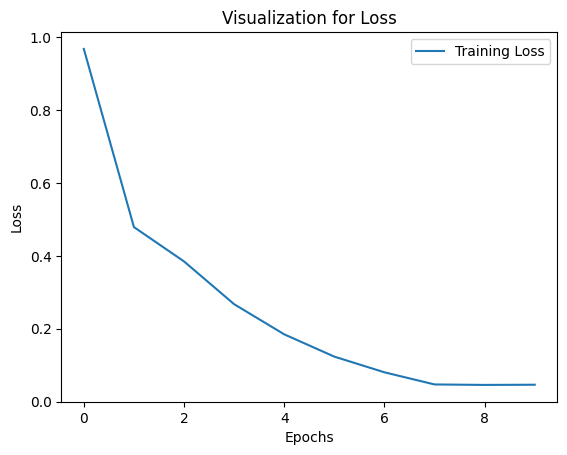

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(loss, label='Training Loss')
plt.title('Visualization for Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
